<font size=6>**Lecture 2: The Machine Learning landscape**</font>
<div style="border: 1px solid lightgray; padding: 10px; background-color: #f9f9f9;">

<font size=1>

    Paolo Bonfini, 2024. All rights reserved.

This work is the intellectual property of `Paolo Bonfini`. All content produced in this notebook is original creation of the author unless specified otherwise. Unauthorized use, reproduction, or distribution of this material, in whole or in part, without explicit permission from the author, is strictly prohibited.
</font>
</div>

_NOTE: The introduction to the Machine Learning landscape reported here is just a distilled summary, most of the lecture is presented in class following Gerone (2017) book, chapter 1_

- - -

# Using sklearn models

In the following example we will see how to use `sklearn`'s models to fit some data.

We will try a simple **linear** model and then switch to a more **complex** one.

_NOTE: We saw a lot of linear models in the previous lecture, but here we see how to define and fit them in `sklearn`._

**Data**: The data report, for various countries, two features: the GDP and an index of "life satisfaction".

In [4]:
# Load data
import tarfile
import pandas as pd

with tarfile.open("L02_data_inclass.tar.gz", 'r:gz') as tar:
    csv_file = tar.extractfile("data/country_stats.csv")
    if csv_file: df_data = pd.read_csv(csv_file)

display(df_data.head(5))
print("Dataset length: %s samples" % len(df_data))

,Country,GDP per capita,Life satisfaction
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.894,4.9
3,Poland,12495.334,5.8
4,Slovak Republic,15991.736,6.1


Dataset length: 29 samples


In [5]:
# Fun facts
df_data[df_data['Country'] == 'Greece']

,Country,GDP per capita,Life satisfaction
6,Greece,18064.288,4.8


Prediction for Greece: [[5.74028836]]


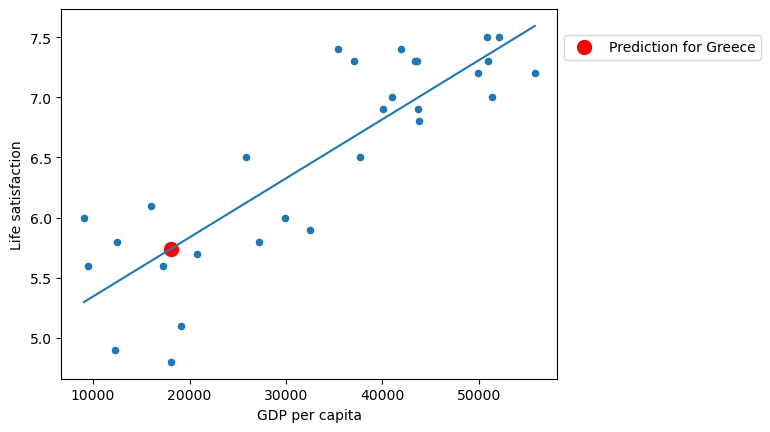

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
X = np.c_[df_data["GDP per capita"]]
y = np.c_[df_data["Life satisfaction"]] # 2D array
# OR:
#y = np.c_[df_data["Life satisfaction"]].flatten() # 1D array

# Visualize the data (using pandas plotting methods)
df_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Select a linear model
import sklearn.linear_model

model = sklearn.linear_model.LinearRegression()
'''
That is all there is to do in `sklearn` to define a linear model!

This defines the generic multi-dimensional linear model (see previous lecture).
The actual dimensionality of the model is sorted out internally, from the data
we will pass.
'''

# Train the model
model.fit(X, y)

# Make a prediction for Greece
X_new = [[18064.288	]]  # Greece' GDP per capita
print('Prediction for Greece: %s' % model.predict(X_new))

# Plot prediction on top of previous plot
plt.scatter(X_new, model.predict(X_new), c='red', s=100, label='Prediction for Greece')
'''When we plotted above, we created a `figure` object implicitly.
If you keep plotting without invoking `plt.show()`, you keep adding to the
same figure.'''

# Predict for the whole training set
yhat = model.predict(X)

# Plot all predictions
plt.plot(X, yhat)

plt.legend(loc='upper left', bbox_to_anchor=(1., 0.95))
plt.show()

- Notice how <u>all</u> the sklearn inputs ($\pmb{X}$) are expected to be 2D:


In [7]:
print("Shape of the X input:", np.shape(X))
print("Shape of the X_new input:", np.shape(X_new))

Shape of the X input: (29, 1)
Shape of the X_new input: (1, 1)


- For the target ($\pmb{y}$), you can input <u>1D or 2D</u>, but if you input 2D (/1D) you get returned 2D (/1D):

In [8]:
print("Shape of the y input:", np.shape(y))
print("Shape of the yhat output:", np.shape(yhat))

Shape of the y input: (29, 1)
Shape of the yhat output: (29, 1)


## What if I want to switch to another model?

E.g., switch from **Linear Regression** model to **k-Nearest Neighbors** regression (_take it as a black box for now_)<br>
$\rightarrow$ replace these two lines:

```python
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
```

with these two:

```python
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
```

In [9]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X,y)

# Make a prediction for Cyprus
print(model1.predict(X_new)) # outputs [[5.76666667]]

[[5.16666667]]


# Regularization issue

Let's assume we have an **overfitting** problem $-$ we use the same data as before ... _plus a few data points_.

In [10]:
# Load data
import pandas as pd

with tarfile.open("L02_data_inclass.tar.gz", 'r:gz') as tar:
    csv_file = tar.extractfile("data/country_stats.csv")
    if csv_file: df_data = pd.read_csv(csv_file)
        
display(df_data.head(5))
print("Dataset length: %s samples" % len(df_data))

,Country,GDP per capita,Life satisfaction
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.894,4.9
3,Poland,12495.334,5.8
4,Slovak Republic,15991.736,6.1


Dataset length: 29 samples


In [11]:
# Create additional mock data
data_added = {
    "Brazil": (8669.998, 7.0),
    "Mexico": (9009.280, 6.7),
    "Chile": (13340.905, 6.7),
    "Czech Republic": (17256.918, 6.5),
    "Norway": (74822.106, 7.4),
    "Switzerland": (80675.308, 7.5),
    "Luxembourg": (101994.093, 6.9),
}

df_data_added = pd.DataFrame.from_dict(data_added).T.reset_index()
df_data_added = df_data_added.rename(columns=\
    {'index': 'Country', 0: 'GDP per capita', 1: 'Life satisfaction'})
display(df_data_added)

# Extending data
df_data_ext = pd.concat([df_data, df_data_added], ignore_index=True)

,Country,GDP per capita,Life satisfaction
0,Brazil,8669.998,7.0
1,Mexico,9009.280,6.7
2,Chile,13340.905,6.7
3,Czech Republic,17256.918,6.5
4,Norway,74822.106,7.4
5,Switzerland,80675.308,7.5
6,Luxembourg,101994.093,6.9


In [12]:
df_data_ext[df_data_ext['Country'] == "Brazil"].values[0]

array(['Brazil', 8669.998, 7.0], dtype=object)

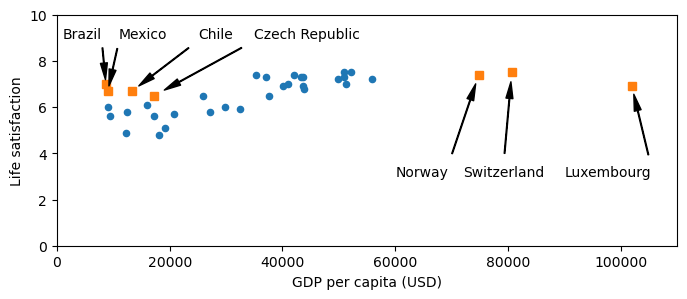

In [13]:
# Plot (this needs a small trick for the arrows)
df_data_ext.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

position_text = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

for country, pos_text in position_text.items():
    _, pos_data_x, pos_data_y = df_data_ext[df_data_ext['Country'] == country].values[0]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "s", c="C1")

plt.xlabel("GDP per capita (USD)")

plt.show()

## Fitting a ridiculously overfitting "black box" model

We will use the `KNeighborsRegressor` algorithm.

Simply speaking, `KNeighborsRegressor` just takes the average of the nearest $k$ points, but we will think of it as a "_black box_", for the purpose of this example.

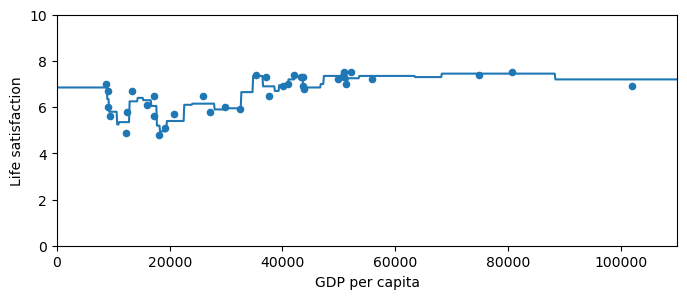

In [14]:
import sklearn.neighbors
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = np.c_[df_data_ext["GDP per capita"]]
y = np.c_[df_data_ext["Life satisfaction"]] # 2D array

# Normalize, for good habits
scaler = StandardScaler()
X_n = scaler.fit_transform(X)

# Fit
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=2)
model.fit(X_n, y)

# Predict on a range, to display the model curve
xx = np.linspace(0, 110000, 1000)
xx_n = scaler.transform(xx.reshape(-1, 1))
''' `x` this needs to be normalized as well'''
yy_model = model.predict(xx_n)

# Plot
df_data_ext.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])
# ^This is here only to have the same range as the above figure

plt.plot(xx, yy_model)

plt.show()

> _As you can see, it [almost] goes through each and every point._

$\rightarrow$ A model like this needs to be **regularized** == reduce its "_degrees of freedom_"

## Regularization alternative: bootstrapping


We will see proper _regularization_ tricks in the future classes

> Now let's see how we can place **confidence intervals** to a model.

- using **parameters** $\rightarrow$ We could sample models around the _best-fitting_ form the parameter errors (_see e.g., Least Squares_)
- using the **data** &emsp;&emsp;&emsp;&emsp;&ensp; $\rightarrow$  We could <u>resample the data</u> multiple times and fit again.

**Bootsrapping == random sampling with replacement**

<div>
   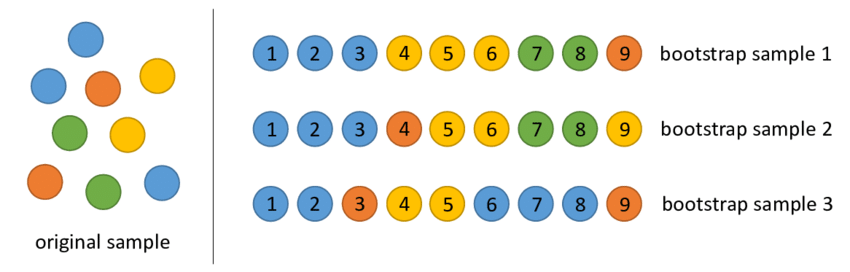
</div>

<table><tr>
    <td width=500>
        <center>
            <br>
            Figure 1. Bootstrapping example.<br>
            (From <a href="https://www.researchgate.net/figure/An-example-of-bootstrap-sampling-Since-objects-are-subsampled-with-replacement-some_fig2_322179244">here</a>)
        </center>
    </td>
</tr></table>


> _The assumption is that every bootstrapped sampled is a representative sub-sample of the true population._

<u>IMPORTANT:</u> There is **replacement** $-$ some samples can appear multiple times in a bootstrapped dataset.

This is how to do it in python:

In [15]:
from sklearn.utils import resample

n_bootstraps = 10

# Perform bootstrapping multiple times
for _ in range(n_bootstraps):
    df_bootstrap_data = resample(df_data_ext, random_state=12, replace=True)  
    
    # Prepare the data
    X = np.c_[df_bootstrap_data["GDP per capita"]]
    y = np.c_[df_bootstrap_data["Life satisfaction"]] # 2D array
    
'''Notice that each bootstrapped dataset has the same lenght as the original.'''
print('Lenght of original data: %s samples' % len(df_data_ext))
print('Lenght of the last bootstapped dataset: %s samples' % len(df_bootstrap_data))
print()
print('Some countries may appear more than once - e.g., in the last bootstrapped sample:')
display(df_bootstrap_data.groupby(['Country']).size().head(5))

Lenght of original data: 36 samples
Lenght of the last bootstapped dataset: 36 samples

Some countries may appear more than once - e.g., in the last bootstrapped sample:


Country
Australia         3
Belgium           1
Czech Republic    2
Denmark           2
Estonia           1
dtype: int64

<div class="alert alert-block alert-warning" style="margin-top: 20px">

#  In-class Exercise [20 min]

**Objective:** Use bootstrapping to display the `KNeighborsRegressor` model uncertainty in a plot. 

You should obtain something like this:

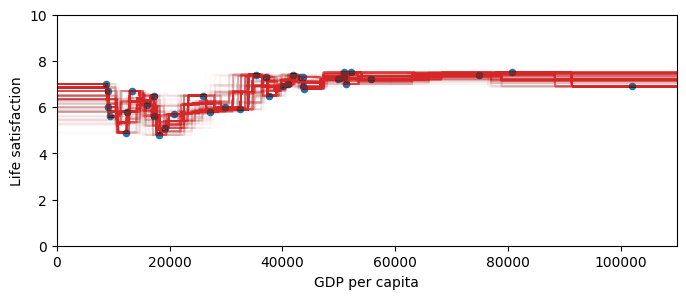

**Task:**  In particular, you will have to:
1. Fit the model on each bootstrapped dataset
2. For each fitted model, add a curve to the plot

**Hints:** 
- Keep `n_bootstraps` low while you are testing, then increase it to 1000.
</div>    

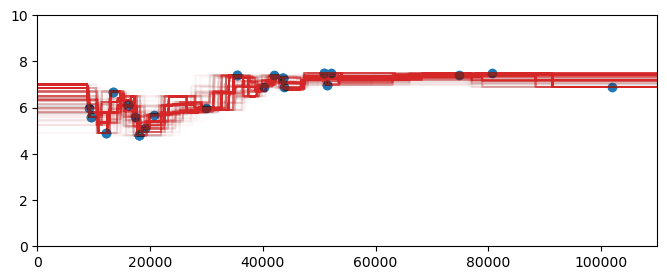

In [50]:
######################################
######################################
# Replace "..." with the proper code #
######################################
######################################
from sklearn.utils import resample
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=2)

from sklearn.preprocessing import StandardScaler
#auto ousiastika kanonikopoiei ta data m wste to 'istogramma'  pu tha kanw print nane normalizes
scaler = StandardScaler()
X_n = scaler.fit_transform(X)
... # Import model and normalization
... # Initialize figure with the data alone
plt.figure(figsize=(8, 3))
n_bootstraps = 1000
plt.axis([0, 110000, 0, 10])
# Perform bootstrapping
for _ in range(n_bootstraps):
    df_bootstrap_data = resample(df_data_ext, replace=True)  
   
    # Prepare the data:
    X = np.c_[df_bootstrap_data["GDP per capita"]]
    y = np.c_[df_bootstrap_data["Life satisfaction"]] # 2D array
    X_n = scaler.fit_transform(X)
    
    model.fit(X_n,y)
    
    xx = np.linspace(0, 110000, 1000)
    xx_n = scaler.transform(xx.reshape(-1, 1))
# oti bazw mesa sto model m prepei nane 2d array giauto kai to reshape etsi thelei to library
    yy_model = model.predict(xx_n)
    plt.plot(xx, yy_model, c='C3', alpha=10/n_bootstraps)
plt.scatter(X, y)     

<hr style='height:1px'>

_Our solution_

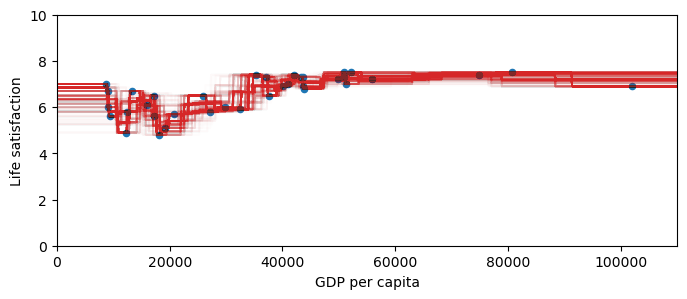

In [17]:
'''Same as above, but we repeat `n_boostraps` tiems, each time fitting on a
different bootstrapped dataset.'''
import sklearn.neighbors
from sklearn.preprocessing import StandardScaler

# Initialize plot with actual data
df_data_ext.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])
# ^This is here only to have the same range as the above figure

from sklearn.utils import resample

n_bootstraps = 1000

# Perform bootstrapping multiple times
for _ in range(n_bootstraps):
    df_bootstrap_data = resample(df_data_ext, replace=True)  
    
    # Prepare the data
    X = np.c_[df_bootstrap_data["GDP per capita"]]
    y = np.c_[df_bootstrap_data["Life satisfaction"]] # 2D array
    '''
    And that's all, the rest is just copy-pasta from above, just replacing:
        `df_data_ext` --> `df_bootstrap_sample`
    '''

    # Normalize, for good habits
    scaler = StandardScaler()
    X_n = scaler.fit_transform(X)

    # 1. Fit
    model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=2)
    model.fit(X_n, y)

    # 2. Predict on a range, to display the model curve
    xx = np.linspace(0, 110000, 1000)
    xx_n = scaler.transform(xx.reshape(-1, 1))
    ''' `x` this needs to be normalized as well'''
    yy_model = model.predict(xx_n)

    # Plot bootstrapped model
    plt.plot(xx, yy_model, c='C3', alpha=10/n_bootstraps)

plt.show()

This gives us a better feeling of the uncertainty on the model, although in the case of `KNeighborsRegressor` we would probably need to calibrate also the hyperparameter `n_neighbors`.

$\rightarrow$ _We will see how in future classes._

<div class="alert alert-block alert-warning" style="margin-top: 20px">

#  In-class Exercise [45 min]

**Objective:** Try to find the feature that correlates the best with GDP, in the provided dataset. 

**Tasks:** 
- Perform your search by inspecting `Life satisfaction` _against_ any other variable in the GDP dataset of your choice
- Fit  `Life satisfaction` using your best candidate variable
- _Follows, in-class discussion_

**Hints:** 
- You can use a `LinearRegression` or `KNeighborsRegressor`
    </div>

,Country,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
0,Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
1,Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
2,Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
3,Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
4,Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


Dataset length: 36 samples
Country                                       object
Air pollution                                float64
Assault rate                                 float64
Consultation on rule-making                  float64
Dwellings without basic facilities           float64
Educational attainment                       float64
Employees working very long hours            float64
Employment rate                              float64
Homicide rate                                float64
Household net adjusted disposable income     float64
Household net financial wealth               float64
Housing expenditure                          float64
Job security                                 float64
Life expectancy                              float64
Life satisfaction                            float64
Long-term unemployment rate                  float64
Personal earnings                            float64
Quality of support network                   float64
Rooms per person   

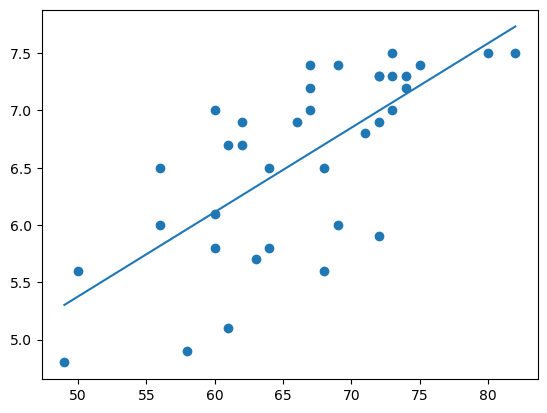

In [12]:
import pandas as pd
import numpy as np
import tarfile
import matplotlib.pyplot as plt  # Ensure to import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
with tarfile.open("L02_data_inclass.tar.gz", 'r:gz') as tar:
    csv_file = tar.extractfile("data/full_country_stats.csv")
    if csv_file: 
        df = pd.read_csv(csv_file)

# Display the first 5 rows and dataset length
display(df.head(5))
print("Dataset length: %s samples" % len(df))

# Prepare list to store R² scores
lista = []

print(df.dtypes)

# Define the target variable once
y = np.array(df['Life satisfaction'].values)
k=0
pp=[]
# Loop through the columns
for j in df.columns:
    if j!='Life satisfaction':
        if df[j].dtype == np.float64:  # Only consider float columns
            # Prepare the feature variable
            x = np.array(df[j].values).reshape(-1, 1)
            k=k+1
            # Initialize and fit the linear regression model
            model = LinearRegression()
            model.fit(x, y)

            # Prepare new input values for prediction
            xx = np.linspace(np.min(x), np.max(x), 100000).reshape(-1, 1)
            yy = model.predict(xx)

            # Calculate R² score correctly using y and the predicted values
            r2 = r2_score(y, model.predict(x))
            print(f'For {j}, R² = {r2}')

        # Append R² score to the list if it's not for 'Life satisfaction'
        
            lista.append(r2)
            pp.append(j)
# Convert list to numpy array
listaa = np.array(lista)
print(np.max(listaa))
index=np.argmax(listaa)
ppp=np.array(pp)
print(ppp[index])
x1=np.array(df['Employment rate'].values)

plt.scatter(x1,y)

model.fit(x1.reshape(-1,1),y)
xx = np.linspace(np.min(x1), np.max(x1), 100000).reshape(-1, 1)
xx1=xx.reshape(-1,1)
yy1=model.predict(xx1)
plt.plot(xx1,yy1)
print('ara to linear duleyei kltr gia to employment rate queen ate')


<hr style='height:1px'>

**IMPORTANT**: Do NOT forget to write your group name in the cell below, and rename this file to \<group\>\_HW\<N\>\_2024.ipynb, where "\<group\>" is your group name and \<N\> is the Homework number.

_It's enough that 1 student of the group submits the solutions for the whole group._

You can leave the above code or $-$ _better!_ $-$ remove it.  But, in any case, <u>make sure</u> that the notebook gives the results you expected when it's run from top to bottom (you might have saved variables in blocks executed before and then deleted!).  We will not debug it for you!

**Group name**: _ _ _ _ _ _

<hr style='height:1px'>

# HomeWork02

<font size=1>
    Nikolaos Vasilas & Elias Kyritsis, 2024. All rights reserved.
</font>    

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Exercise 1: Regression Models**

In Machine Learning and Data Science, a common type of problem one can tackle is regression problems. The aim of this exercise is to get you familiar with complex problems in which you will spend time trying to select the correct model, fine-tune the hyperparameters, and deal with overfitting and underfitting issues.
<br><br>

**Objective:** Explore different regression models and fit them to data from the file `HW02_data.csv` to get familiar with the `sklearn` library.
<br><br>

**Tasks:**

- **Ex 1.1:** Load the data from the file `HW02_data.csv` and split it into two datasets. The first dataset must contain only the data points whose values on the feature called "x" are less than 10. The second should contain the rest of the data points.<br>
Fit a **Linear Regression** model to the first set. Calculate their **Mean Squared Error (MSE)**. Then, predict the values for x between 10 and 30. Plot the predictions and compare them to the whole dataset from the file.
<br>
$\rightarrow$ What do you notice? Can you recognize a case of overfitting? Comment on this result.<br><br>

- **Exs 1.2:** Use the second dataset and fit both a **Linear Regression** model _and_ a **RandomForest Regressor** model (_use it as a black box, for now_). Calculate their **MSE**. Then, predict the values for x between 0 and 10. Plot the predictions for both models and compare them to the whole dataset from the file.
<br>
$\rightarrow$ What do you notice? Can you recognize a case of overfitting? Comment on this result.<br><br>

- **Exs 1.3:** You can create "by hand" a combined model that consists of one linear component and one RandomForest component. You can do this by simply merging the predicted $\hat{y}$ values from <b>Ex 1.1</b> and <b>Ex 1.2</b> into a single array. Combine them and calculate the "Total MSE" (MSE$_{tot}$).<br>
Plot those combined predictions along with the whole dataset.
<br>
$\rightarrow$ What do you observe?
<br><br>   
Compare MSE$_{tot}$ with the MSEs you calculated in <b>Ex 1.1</b> and <b>Ex 1.2</b>.
<br>
<br>    
$\rightarrow$ Does the result align with your intuition?
<br><br>

- **Exs 1.4:** Use the _whole_ dataset to train a **RandomForest Regressor** model, calculate the MSE, and plot the predictions against the actual data. Compare that MSE with the previous ones.
<br>    
$\rightarrow$ What do you notice? Can you recognize a case of overfitting? Comment on this result.
<br><br>

- **Exs 1.5:** RandomForest Regressor has a number of <b>hyperparameters</b>. As you will see in the book:
> *"A hyperparameter is a parameter of a learning algorithm (not of the model). As such, it is not affected by the learning algorithm itself; it must be set prior to training and remains constant during training."*

<div style="padding-left: 1cm;">

_Let's focus on the hyperparameter `n_estimators`_:
    
Create an array of `n_estimators` values within the range of 10 to 200, with a step of 5. For each of these values, train and evaluate a RandomForest Regressor model using the MSE metric. Make a plot of the MSE as a function of the `n_estimators` values.

$\rightarrow$ What do you notice? Which value of `n_estimators` would you pick as the optimal one?
    
Compare that MSE with the last two you calculated.
</div>

**Hints:**
- Before training, don't forget to normalize the data.
- The documentation for the models is available:
  - [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for `Linear Regressor`
  - [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) for `RandomForest Regressor` 

</div>

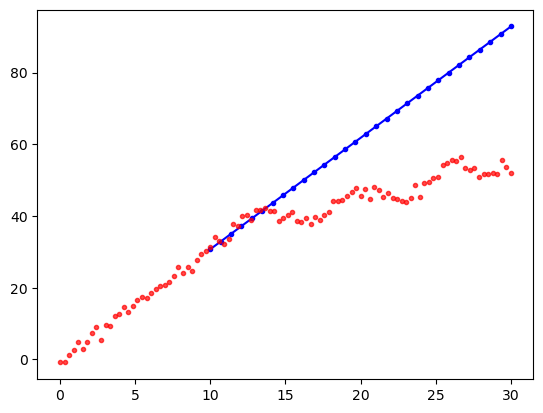

MSE for the linear model=1.141343


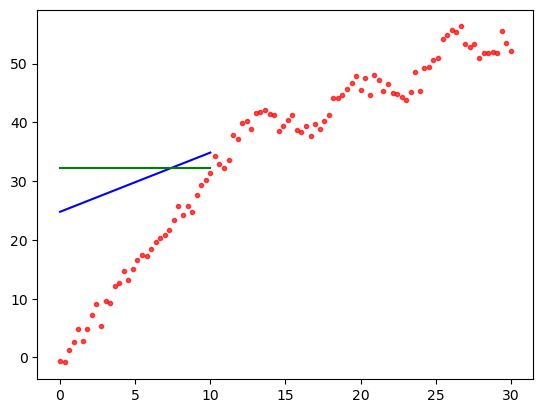

MSE for the linear model2=5.763038
MSE for the random forest model2=0.322369


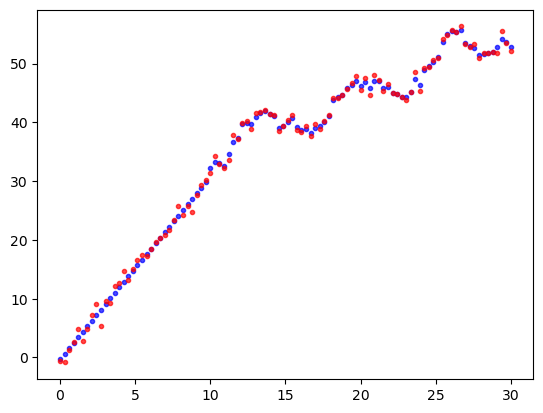

Total MSE=0.592630


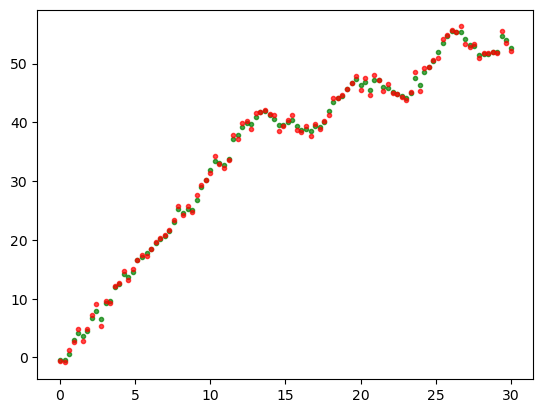

MSE_3=0.287127
The best n_estimators=115.0 with an MSE=0.31096944210236477


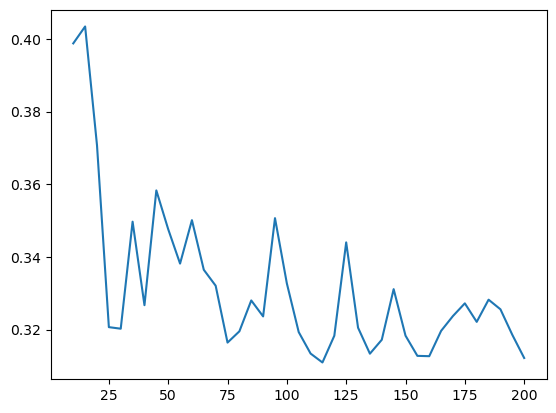

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error

df=pd.read_csv("/Users/arisk/Desktop/Machine Learning/2/HW02_data.csv")

x=np.array(df['x'])
y=np.array(df['y'])
mask1=(df['x']<10)
mask2=(df['x']>=10)
df1=df[mask1]
df2=df[mask2]
scaler=StandardScaler()
x1=np.array(df1['x'].values).reshape(-1,1)
y1=np.array(df1['y'].values)
x2=np.array(df2['x'].values).reshape(-1,1)
y2=np.array(df2['y'].values)


X1=scaler.fit_transform(x1)
model1 = sklearn.linear_model.LinearRegression()
##################################X_n = scaler.fit_transform(X)
model1.fit(X1,y1)
yy1=model1.predict(X1)
mse1=(np.sum((y1-yy1)**2))/(len(y1))

xx1=np.linspace(10,30,30).reshape(-1,1)
XX1=scaler.transform(xx1)
plt.plot(xx1.reshape(-1,1),model1.predict(XX1),'o-b',ms=3,)
plt.plot(x,y,'or', ms=3,alpha=0.7)
plt.show()
print(f'MSE for the linear model={mse1:3f}')
#parathrume oti ta dedomena sta opoia kaname fit to modelo mas einai para poly linear akribws opws 
# kai to modelo mas alla ta test data mas apokleinun arketa apo ayto sto opoio emeis kaname train 
#to modelo mas kai giayto den mporei na kanei swsta predict ta dedomena gia x>10 15 prp
#kathws meta apo to x=14 ta dedomena mas pauoyn na einai grammika me ton tropo pu htan gia 0<x<14 kai 
# etsi to ekpedeumeno modelo mas pu einai trained se poly poly 'kala kai linear' data den borei na
# kanei swsta predict ta ypoloipa pu apokleinun apo to linear fit kai oti emeis exume mathei to modelo
#mas

X2=scaler.fit_transform(x2)
model2=sklearn.linear_model.LinearRegression()
model2.fit(X2,y2)
yy2=model2.predict(X2)
mse2=(np.sum((y2-yy2)**2))/(len(y2))

rfmodel2=RandomForestRegressor()
rfmodel2.fit(X2,y2)
rfyy2=rfmodel2.predict(X2)
mse22=(np.sum((y2-rfyy2)**2))/(len(y2))


xx2=np.linspace(0,10,30).reshape(-1,1)
XX2=scaler.transform(xx2)
Y2=model2.predict(XX2)
YY2=rfmodel2.predict(XX2)

plt.plot(xx2,Y2,'b')
plt.plot(xx2,YY2,'g')
plt.plot(x,y,'or', ms=3,alpha=0.7)
plt.show()
print(f'MSE for the linear model2={mse2:3f}')
print(f'MSE for the random forest model2={mse22:3f}')

# nai blepw overfitting blbalblablalblablablablalb
merge=np.hstack((yy1,rfyy2))

msetot=(np.sum((y-merge)**2))/(len(y))
plt.plot(x,merge,'ob', ms=3,alpha=0.7)
plt.plot(x,y,'or', ms=3,alpha=0.7)
plt.show()
# exume kanei combine kai exei ginei xamos mlk pws ekane fit etsi akraio bro
print(f'Total MSE={msetot:3f}')

# kati prepei na kanw observe de to blepw ygeia akoma

model3=RandomForestRegressor()
xr=x.reshape(-1,1)
XR=scaler.fit_transform(xr)
model3.fit(XR,y)
y3=model3.predict(XR)
mse3=(np.sum((y-y3)**2))/(len(y))

plt.plot(x,y3,'og', ms=3,alpha=0.7)
plt.plot(x,y,'or', ms=3,alpha=0.7)
plt.show()
print(f'MSE_3={mse3:3f}')

# ee auto de kanei overfit gia kapio logo allaaaaa coolll
n_estimators=np.arange(10, 201, 5)
l=[]
for i in n_estimators:
    model4=RandomForestRegressor(n_estimators=i)
    model4.fit(XR,y)
    y4=model4.predict(XR)
    msei = mean_squared_error(y, y4)
    l.append(msei)
plt.plot(n_estimators,l)
l=np.array(l).reshape(-1,1)
n=n_estimators.reshape(-1,1)
ola=np.hstack((l,n))

min_index=np.argmin(ola[:, 0])

print(f'The best n_estimators={ola[min_index,1]} with an MSE={ola[min_index,0]}')
